In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [128]:
df_cd=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic')


df_cd.columns=df_cd.iloc[0,:]  #First row is made as dataframe columns
df_cd.drop(0,axis=0,inplace=True)   #First row is dropped from the axis
df_cd.reset_index(drop=True,inplace=True)   #Now indices are reset original value.
                            



df_cd=df_cd.iloc[:,0:13]
               #Unnecesary columns trimmed.




df_tr=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='Transactions')


df_tr.columns=df_tr.iloc[0,:]  #First row is made as dataframe columns
df_tr.drop(0,axis=0,inplace=True)   #First row is dropped from the axis
df_tr.reset_index(drop=True,inplace=True)   #Now indices are reset original value.




df_tr=df_tr.iloc[:,:13]



df_ca=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerAddress')


df_ca.columns=df_ca.iloc[0,:]  #First row is made as dataframe columns
df_ca.drop(0,axis=0,inplace=True)   #First row is dropped from the axis
df_ca.reset_index(drop=True,inplace=True)   #Now indices are reset original value.


df_ca=df_ca.iloc[:,:6]


In [129]:
df_cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [130]:
df_ca.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [131]:
df_tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [132]:
# Checking null values in tables
df_ca.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [135]:
mdf=(df_cd.isnull().sum()/len(df_cd))*100
rdf=pd.DataFrame((df_cd.isnull().sum()/len(df_cd))*100,index=mdf.index,columns=['Missing_Percentage_Value'])
rdf.index.name='Features'
rdf

,Missing_Percentage_Value
Features,
customer_id,0.000
first_name,0.000
last_name,3.125
gender,0.000
past_3_years_bike_related_purchases,0.000
DOB,2.175
job_title,12.650
job_industry_category,16.400
wealth_segment,0.000


In [64]:
(df_tr.isnull().sum()/len(df_tr))*100

0
transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [65]:
# Lets start with transcation dataset for an RFM analysis

In [66]:
df_tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [67]:
df_tr[df_tr.duplicated()==True]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [68]:
df_tr.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [69]:
df_tr.shape

(20000, 13)

In [70]:
dft=df_tr.copy()

In [71]:
dft=dft[dft.order_status=='Approved']
dft.shape

(19821, 13)

In [72]:
dft=dft.drop('order_status',1)
dft.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701


In [73]:
dft['year']=dft.transaction_date.apply(lambda c:c.year)
dft.year.value_counts()
#All year is 2017

2017    19821
Name: year, dtype: int64

In [74]:
dft.drop('year',1,inplace=True)

In [75]:
dft.transaction_id.nunique()  #No of trasactions

19821

In [76]:
dft.product_id.nunique()  #no  of product sold

101

In [77]:
dft.customer_id.nunique()  #no of customers

3493

## Recenscy

In [78]:
dft[['transaction_date']].max() #Last date of purchase

0
transaction_date    2017-12-30 00:00:00
dtype: object

In [79]:
import datetime
now=datetime.date(2017,12,30)


In [80]:
now=pd.to_datetime(now)
print(now)

2017-12-30 00:00:00


In [81]:
recency_df=dft.groupby('customer_id',as_index=False)['transaction_date'].max()
recency_df.columns=['customer_id','last_purchased']

recency_df.head()

,customer_id,last_purchased
0,1,2017-12-23
1,2,2017-08-24
2,3,2017-09-19
3,4,2017-06-18
4,5,2017-12-14


In [82]:
recency_df['recency']=recency_df.last_purchased.apply(lambda x: (now-x).days)
recency_df.head()

,customer_id,last_purchased,recency
0,1,2017-12-23,7
1,2,2017-08-24,128
2,3,2017-09-19,102
3,4,2017-06-18,195
4,5,2017-12-14,16


In [83]:
recency_df.drop('last_purchased',1,inplace=True)

## Frequency

In [84]:
dft.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [85]:
#Before analysisng we need to find out if there is any duplicates for (transaction_id,product_id,customer_id) combination

In [86]:
dft[dft.iloc[:,:3].duplicated()==True] #There is no such records

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [87]:
#check for (transaction_id,customer_id) combination

In [88]:
dft[dft.iloc[:,[0,2]].duplicated()==True]  # Again there is no such records.

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [89]:
dft.iloc[:,[0,2]]

,transaction_id,customer_id
0,1,2950
1,2,3120
2,3,402
3,4,3135
4,5,787
...,...,...
19995,19996,1018
19996,19997,127
19997,19998,2284
19998,19999,2764


In [90]:
frequency_df=dft.groupby('customer_id',as_index=False)['transaction_id'].count()
frequency_df.head()

,customer_id,transaction_id
0,1,11
1,2,3
2,3,8
3,4,2
4,5,6


## Monetary

In [91]:
#List price is aslo known as manufacturer suggested retail price(MSRP)
#Standard_cost is a scientific process to calculated the cost of manufacturing unit.
dft.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25 00:00:00,False,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21 00:00:00,True,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16 00:00:00,False,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31 00:00:00,False,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,5,78,787,2017-10-01 00:00:00,True,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [92]:
monetary_df=dft.groupby('customer_id',as_index=False)['list_price'].sum()
monetary_df.head()

,customer_id,list_price
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20


## Creating a RFM table

In [93]:
recency_df.shape[0],monetary_df.shape[0],frequency_df.shape[0]   #Equal number of rows for all customers.

(3493, 3493, 3493)

In [94]:
df_=pd.merge(recency_df,monetary_df,how='inner',on='customer_id')


In [95]:
frequency_df.columns=['customer_id','freq']
frequency_df.head(2)

,customer_id,freq
0,1,11
1,2,3


In [96]:
rfm_df=pd.merge(df_,frequency_df,how='inner',on='customer_id')

rfm_df.head(2)

,customer_id,recency,list_price,freq
0,1,7,9084.45,11
1,2,128,4149.07,3


In [97]:
rfm_df.columns=['customer_id','recency','monetary','frequency']
rfm_df.head()

,customer_id,recency,monetary,frequency
0,1,7,9084.45,11
1,2,128,4149.07,3
2,3,102,9888.23,8
3,4,195,1047.72,2
4,5,16,5903.20,6


In [98]:
rfm_df=rfm_df[['customer_id','recency','frequency','monetary']]
rfm_df.head(2)

,customer_id,recency,frequency,monetary
0,1,7,11,9084.45
1,2,128,3,4149.07


In [99]:
# Apply pareto's rule 

In [100]:
#ranking them on the basis of monetary value
rfm_df['rankings']=rfm_df.monetary.rank(ascending=False)
rfm_df.sort_values('rankings',ascending=False).head()   # So our ranking is correct

,customer_id,recency,frequency,monetary,rankings
3283,3292,301,1,60.34,3493.0
2526,2532,140,1,71.49,3492.0
2268,2274,55,2,142.98,3491.0
3182,3189,56,2,200.70,3490.0
2417,2423,59,1,202.62,3489.0


In [101]:
# Top 20% of people

3493*0.2   #Approximately 700,so lets consider <700

698.6

In [102]:
top20=rfm_df[rfm_df.rankings<700].monetary.sum()
top20

7489648.92

In [103]:
last80=rfm_df[rfm_df.rankings>700].monetary.sum()
last80

14455856.73

# Important add this to presentation.

In [104]:
top20/(top20+last80)  # Top 20 percentage of customers contributing to 34 % of monetary value

0.34128395305395937

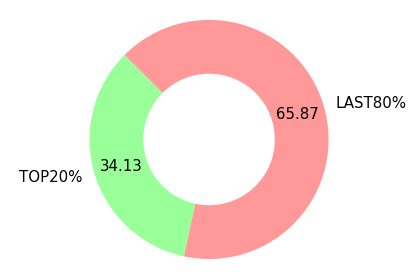

In [105]:

fig1, ax1 = plt.subplots()
ax1.pie(x=[top20,last80],autopct='%.2f',labels=['TOP20%','LAST80%'],colors=['#99ff99','#ff9999'],
        pctdistance=0.77,textprops={'fontsize': 15},labeldistance=1.1,startangle=135);

centre_circle = plt.Circle((0,0),0.55,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [106]:
## RFM Score Analysis

In [107]:
#Define quratiles so that we can cluster them on basis of RFM
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])  
quantiles

,customer_id,recency,frequency,monetary,rankings
0.25,877.0,17.0,4.0,4162.96,874.0
0.50,1751.0,44.0,6.0,5974.77,1747.0
0.75,2625.0,86.0,7.0,8157.72,2620.0


In [108]:
quantiles.to_dict()

{'customer_id': {0.25: 877.0, 0.5: 1751.0, 0.75: 2625.0},
 'recency': {0.25: 17.0, 0.5: 44.0, 0.75: 86.0},
 'frequency': {0.25: 4.0, 0.5: 6.0, 0.75: 7.0},
 'monetary': {0.25: 4162.96, 0.5: 5974.77, 0.75: 8157.719999999999},
 'rankings': {0.25: 874.0, 0.5: 1747.0, 0.75: 2620.0}}

In [109]:
#definign a function to apply each value
#Recency =4 for less value , meaning a recent customer
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# For both frequency and monetary high value is preffered.
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [110]:
rfm_df.head()

,customer_id,recency,frequency,monetary,rankings
0,1,7,11,9084.45,587.0
1,2,128,3,4149.07,2629.0
2,3,102,8,9888.23,419.0
3,4,195,2,1047.72,3437.0
4,5,16,6,5903.20,1786.0


In [111]:
#creating rfm_score dataframe for rfm scoring
rfm_score = rfm_df.copy()
rfm_score['R_Quartile'] = rfm_score['recency'].apply(RScore, args=('recency',quantiles,))
rfm_score.head(2)

,customer_id,recency,frequency,monetary,rankings,R_Quartile
0,1,7,11,9084.45,587.0,4
1,2,128,3,4149.07,2629.0,1


In [112]:
rfm_score['F_Quartile'] = rfm_score['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_score.head()

,customer_id,recency,frequency,monetary,rankings,R_Quartile,F_Quartile
0,1,7,11,9084.45,587.0,4,4
1,2,128,3,4149.07,2629.0,1,1
2,3,102,8,9888.23,419.0,1,4
3,4,195,2,1047.72,3437.0,1,1
4,5,16,6,5903.20,1786.0,4,2


In [113]:
rfm_score['M_Quartile'] = rfm_score['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [114]:
rfm_score.head()

,customer_id,recency,frequency,monetary,rankings,R_Quartile,F_Quartile,M_Quartile
0,1,7,11,9084.45,587.0,4,4,4
1,2,128,3,4149.07,2629.0,1,1,1
2,3,102,8,9888.23,419.0,1,4,4
3,4,195,2,1047.72,3437.0,1,1,1
4,5,16,6,5903.20,1786.0,4,2,2


In [115]:
# Lets combine all the scores for finding best customer

In [116]:
rfm_score['RFMScore'] = rfm_score.R_Quartile.map(str) + rfm_score.F_Quartile.map(str) + rfm_score.M_Quartile.map(str)
rfm_score.head()

,customer_id,recency,frequency,monetary,rankings,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,1,7,11,9084.45,587.0,4,4,4,444
1,2,128,3,4149.07,2629.0,1,1,1,111
2,3,102,8,9888.23,419.0,1,4,4,144
3,4,195,2,1047.72,3437.0,1,1,1,111
4,5,16,6,5903.20,1786.0,4,2,2,422


In [117]:
# So customer having 444 is the best and 111 is the worst in consideration of recency, frequency and monetary

In [118]:
rfm_score[rfm_score['RFMScore']=='444'].sort_values('monetary', ascending=False).head(10)
#customer 2183 has a purchase 8 days before the last purchase, number of trascations is 14, and total purchase is 19071.

,customer_id,recency,frequency,monetary,rankings,R_Quartile,F_Quartile,M_Quartile,RFMScore
2177,2183,8,14,19071.32,1.0,4,4,4,444
1136,1140,6,13,16199.24,8.0,4,4,4,444
727,729,1,10,15826.00,10.0,4,4,4,444
1313,1317,10,9,15370.81,12.0,4,4,4,444
320,322,1,12,14782.23,17.0,4,4,4,444
3041,3048,4,13,14756.09,18.0,4,4,4,444
2853,2860,8,10,14673.35,19.0,4,4,4,444
1455,1460,12,8,14633.24,21.0,4,4,4,444
2470,2476,14,14,14578.69,24.0,4,4,4,444
2458,2464,2,13,14574.06,25.0,4,4,4,444


In [119]:
print("Best Customers  having rfm score of 444: ",len(rfm_score[rfm_score['RFMScore']=='444']))
print('Loyal Customers who have most number of purchase : ',len(rfm_score[rfm_score['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_score[rfm_score['M_Quartile']==4]))
print('Almost Lost but they  were frequent customers and bigspenders: ', len(rfm_score[rfm_score['RFMScore']=='244']))
print('Lost Customers who were frequent customers and bigspenders: ',len(rfm_score[rfm_score['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_score[rfm_score['RFMScore']=='111']))

Best Customers  having rfm score of 444:  210
Loyal Customers who have most number of purchase :  715
Big Spenders:  873
Almost Lost but they  were frequent customers and bigspenders:  131
Lost Customers who were frequent customers and bigspenders:  39
Lost Cheap Customers:  338


In [120]:
ana=pd.DataFrame({'Best_Customer':len(rfm_score[rfm_score['RFMScore']=='444']),
'Loyal_Customer':len(rfm_score[rfm_score['F_Quartile']==4]),
'Big_Spendors':len(rfm_score[rfm_score['M_Quartile']==4]),
'Almost_Lost_Best_Customer':len(rfm_score[rfm_score['RFMScore']=='244']),
'Lost_Best_Customer':len(rfm_score[rfm_score['RFMScore']=='144']),
'Lost_Cheap_Customer':len(rfm_score[rfm_score['RFMScore']=='111'])},index=[0])

ana=ana.T
ana

,0
Best_Customer,210
Loyal_Customer,715
Big_Spendors,873
Almost_Lost_Best_Customer,131
Lost_Best_Customer,39
Lost_Cheap_Customer,338


In [122]:
ana.columns=['No of Customers']

Text(4.8, 350, '338')

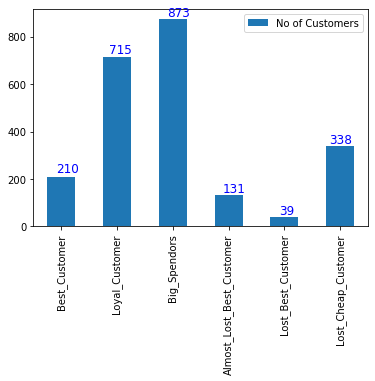

In [126]:
ana.plot(kind='bar')

plt.text(x=-0.1,y=230,s='210',color='b',fontdict={'fontsize':'large'})
plt.text(x=0.85,y=730,s='715',color='b',fontdict={'fontsize':'large'})
plt.text(x=1.9,y=885,s='873',color='b',fontdict={'fontsize':'large'})
plt.text(x=2.89,y=142,s='131',color='b',fontdict={'fontsize':'large'})
plt.text(x=3.9,y=52,s='39',color='b',fontdict={'fontsize':'large'})
plt.text(x=4.8,y=350,s='338',color='b',fontdict={'fontsize':'large'})




In [1573]:
rfm_df.head()

,customer_id,recency,frequency,monetary,rankings
0,1,7,11,9084.45,587.0
1,2,128,3,4149.07,2629.0
2,3,102,8,9888.23,419.0
3,4,195,2,1047.72,3437.0
4,5,16,6,5903.20,1786.0


In [1574]:
# Now we will be joining the tables together to get a completer table

In [1575]:
df_cd.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [1576]:
df_cd.shape

(4000, 13)

In [1577]:
df_=pd.merge(df_cd,df_ca,on='customer_id')
df_.shape

(3996, 18)

In [1578]:
tot_df=pd.merge(df_,rfm_score,on='customer_id')
tot_df.shape

(3488, 26)

In [1579]:
tot_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,country,property_valuation,recency,frequency,monetary,rankings,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,...,Australia,10,7,11,9084.45,587.0,4,4,4,444
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,...,Australia,10,128,3,4149.07,2629.0,1,1,1,111
2,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,...,Australia,9,195,2,1047.72,3437.0,1,1,1,111
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,...,Australia,4,16,6,5903.20,1786.0,4,2,2,422
4,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,...,Australia,9,64,5,5931.69,1769.0,2,2,2,222


In [1580]:
#Dropping the rankings
tot_df.drop('rankings',1,inplace=True)
tot_df.head(1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,...,New South Wales,Australia,10,7,11,9084.45,4,4,4,444


In [1581]:
df=tot_df.copy()

In [1582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3488 entries, 0 to 3487
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3488 non-null   object 
 1   first_name                           3488 non-null   object 
 2   last_name                            3376 non-null   object 
 3   gender                               3488 non-null   object 
 4   past_3_years_bike_related_purchases  3488 non-null   object 
 5   DOB                                  3412 non-null   object 
 6   job_title                            3067 non-null   object 
 7   job_industry_category                2928 non-null   object 
 8   wealth_segment                       3488 non-null   object 
 9   deceased_indicator                   3488 non-null   object 
 10  default                              3234 non-null   object 
 11  owns_car                      

In [1583]:
df.deceased_indicator.value_counts() #only one 'Y' value lets drop it

N    3487
Y       1
Name: deceased_indicator, dtype: int64

In [1584]:
df=df[df.deceased_indicator=='N']
df.shape

(3487, 25)

In [1585]:
df.country.value_counts()  #Zero variance column

Australia    3487
Name: country, dtype: int64

In [1586]:
df.default.value_counts()  #Meaningless column

-1                                  102
100                                 102
1                                    96
-100                                 85
ï½ï½¨(Â´âï½â©                        48
                                   ... 
ì¸ëë°í ë¥´                           25
ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾     25
'"''''"                              24
-0.5                                 23
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ     21
Name: default, Length: 90, dtype: int64

In [1587]:
# Droping customer id,first_name,last_name,address,default,country from dataframe
df=df.drop(['customer_id','first_name','last_name','address','country'],1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 0 to 3487
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3487 non-null   object 
 1   past_3_years_bike_related_purchases  3487 non-null   object 
 2   DOB                                  3411 non-null   object 
 3   job_title                            3066 non-null   object 
 4   job_industry_category                2927 non-null   object 
 5   wealth_segment                       3487 non-null   object 
 6   deceased_indicator                   3487 non-null   object 
 7   default                              3233 non-null   object 
 8   owns_car                             3487 non-null   object 
 9   tenure                               3411 non-null   object 
 10  postcode                             3487 non-null   object 
 11  state                         

In [1588]:
df=df.drop('deceased_indicator',1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 0 to 3487
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3487 non-null   object 
 1   past_3_years_bike_related_purchases  3487 non-null   object 
 2   DOB                                  3411 non-null   object 
 3   job_title                            3066 non-null   object 
 4   job_industry_category                2927 non-null   object 
 5   wealth_segment                       3487 non-null   object 
 6   default                              3233 non-null   object 
 7   owns_car                             3487 non-null   object 
 8   tenure                               3411 non-null   object 
 9   postcode                             3487 non-null   object 
 10  state                                3487 non-null   object 
 11  property_valuation            

In [1589]:
df=df.drop('default',1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 0 to 3487
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3487 non-null   object 
 1   past_3_years_bike_related_purchases  3487 non-null   object 
 2   DOB                                  3411 non-null   object 
 3   job_title                            3066 non-null   object 
 4   job_industry_category                2927 non-null   object 
 5   wealth_segment                       3487 non-null   object 
 6   owns_car                             3487 non-null   object 
 7   tenure                               3411 non-null   object 
 8   postcode                             3487 non-null   object 
 9   state                                3487 non-null   object 
 10  property_valuation                   3487 non-null   object 
 11  recency                       

In [1590]:
(df.isnull().sum()/len(df))*100

gender                                  0.000000
past_3_years_bike_related_purchases     0.000000
DOB                                     2.179524
job_title                              12.073416
job_industry_category                  16.059650
wealth_segment                          0.000000
owns_car                                0.000000
tenure                                  2.179524
postcode                                0.000000
state                                   0.000000
property_valuation                      0.000000
recency                                 0.000000
frequency                               0.000000
monetary                                0.000000
R_Quartile                              0.000000
F_Quartile                              0.000000
M_Quartile                              0.000000
RFMScore                                0.000000
dtype: float64

In [1591]:
#lEts build a model which predicts M_quartile such that we can classifiy them based on their spending

In [1592]:
#job_title job_industry has large number of missing values. Imputing them will create pattern losses in the data

In [1593]:
df.shape

(3487, 18)

In [1594]:
df[df.job_industry_category.isnull()==True].shape

(560, 18)

In [1595]:
df.head()

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,Yes,11,2016,New South Wales,10,7,11,9084.45,4,4,4,444
1,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,Yes,16,2153,New South Wales,10,128,3,4149.07,1,1,1,111
2,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,No,7,4211,QLD,9,195,2,1047.72,1,1,1,111
3,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,Yes,8,2448,New South Wales,4,16,6,5903.20,4,2,2,422
4,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,Yes,13,3216,VIC,9,64,5,5931.69,2,2,2,222


In [1596]:
# We cant leave such column from the dataset too as they are important to our prediction

In [1597]:
#Lets perform a WOE encoding which will take care of the missing values in data.

In [1598]:
df.job_industry_category.value_counts()

Manufacturing         702
Financial Services    686
Health                531
Retail                304
Property              230
IT                    188
Entertainment         123
Argiculture           100
Telecommunications     63
Name: job_industry_category, dtype: int64

In [1599]:
df.job_title.value_counts()

Business Systems Development Analyst    40
Social Worker                           38
Legal Assistant                         37
Tax Accountant                          37
Executive Secretary                     36
                                        ..
Geologist II                             2
Health Coach I                           2
Health Coach III                         2
Research Assistant III                   2
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [1600]:
df.head(2)

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,Yes,11,2016,New South Wales,10,7,11,9084.45,4,4,4,444
1,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,Yes,16,2153,New South Wales,10,128,3,4149.07,1,1,1,111


In [1601]:
# Before encoding lets create a column which shows age of the customer form DOB column

## important

In [1602]:
#Again lets take the last_purchase date to be recent date
print(now)   #this was already defined during rfm analysis

2017-12-30 00:00:00


In [1603]:
df.DOB.isnull().sum()  #Again there are 76 missing values in the column, lets impute them with now so that difference will 
                        # in 0 which will be missing value for age column.

76

In [1604]:
df.DOB.replace(to_replace=np.nan,value=now,inplace=True)
df.DOB.isnull().sum()

#Missing value treated

0

In [1605]:
(now-df.DOB[0])/365.25 # lets divide 365.25 considering leap year every 4 years.

Timedelta('64 days 05:11:27.474332649')

In [1606]:
df.DOB.dtype

dtype('O')

In [1607]:
df.DOB=pd.to_datetime(df.DOB)
df.DOB.dtype

dtype('<M8[ns]')

In [1608]:
df.DOB.head()

0   1953-10-12
1   1980-12-16
2   1961-10-03
3   1977-05-13
4   1966-09-16
Name: DOB, dtype: datetime64[ns]

In [1609]:
df['Age']=df.DOB.apply(lambda r: ((now-r)/365.25).days)
df.Age.head()

0    64
1    37
2    56
3    40
4    51
Name: Age, dtype: int64

In [1610]:
df.Age.value_counts() #There are 0 value in column which are unknown for us
                      #Also there is an entry of 174 year which is impossible , lets replace than with 74 which make sense.

39     186
40     182
43     134
41     133
37     113
44     108
38     108
31      99
42      98
22      86
58      85
32      80
53      78
0       76
46      74
19      71
36      70
48      69
28      69
50      67
30      65
23      65
25      64
29      64
20      63
51      61
52      60
49      60
60      58
55      58
21      57
61      55
57      54
18      52
24      52
62      49
63      49
54      48
59      48
45      47
47      46
27      43
26      42
56      41
17      38
35      36
33      36
34      31
16      29
64      18
15       6
73       1
86       1
174      1
82       1
74       1
77       1
Name: Age, dtype: int64

In [1611]:
df.Age.replace({0:np.nan},inplace=True)
df.Age[df.Age==0]

Series([], Name: Age, dtype: float64)

In [1612]:
df.Age.isnull().sum()  #Same as DOB column

76

In [1613]:
df[df.Age==174]   # As m_quartile is 4 for this person we cant remove it from analysis

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Age
29,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20,4005,QLD,8,102,9,13133.0,1,4,4,144,174.0


In [1614]:
df.Age.replace(174,74,inplace=True)
df[df.Age==174] 

#That record is gone

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Age


In [1615]:
df[df.index==29]

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Age
29,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,No,20,4005,QLD,8,102,9,13133.0,1,4,4,144,74.0


In [1616]:
df.drop('DOB',1,inplace=True)
df.head(1)

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Age
0,F,93,Executive Secretary,Health,Mass Customer,Yes,11,2016,New South Wales,10,7,11,9084.45,4,4,4,444,64.0


In [1617]:
#gender columns has various values which should be actually 2, male and female
df.gender.value_counts()

Female    1754
Male      1653
U           77
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [1618]:
gen_d={'M':"Male","F":'Female',"Femal":'Female','U':np.nan}

df.gender.replace(gen_d,inplace=True)

df.gender.value_counts()

#This shows replacement works while creating nan value.

Female    1756
Male      1654
Name: gender, dtype: int64

In [1619]:
df.isnull().sum()

gender                                  77
past_3_years_bike_related_purchases      0
job_title                              421
job_industry_category                  560
wealth_segment                           0
owns_car                                 0
tenure                                  76
postcode                                 0
state                                    0
property_valuation                       0
recency                                  0
frequency                                0
monetary                                 0
R_Quartile                               0
F_Quartile                               0
M_Quartile                               0
RFMScore                                 0
Age                                     76
dtype: int64

In [1431]:
#Lets consider M_quartile for target variable.

In [1620]:
df=df.drop(['R_Quartile','F_Quartile','RFMScore','recency','frequency','monetary'],1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 0 to 3487
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3410 non-null   object 
 1   past_3_years_bike_related_purchases  3487 non-null   object 
 2   job_title                            3066 non-null   object 
 3   job_industry_category                2927 non-null   object 
 4   wealth_segment                       3487 non-null   object 
 5   owns_car                             3487 non-null   object 
 6   tenure                               3411 non-null   object 
 7   postcode                             3487 non-null   object 
 8   state                                3487 non-null   object 
 9   property_valuation                   3487 non-null   object 
 10  M_Quartile                           3487 non-null   int64  
 11  Age                           

In [1621]:
df.postcode.value_counts()

2170    28
2153    28
2145    27
2155    26
2770    24
        ..
3480     1
2471     1
2469     1
3505     1
2785     1
Name: postcode, Length: 835, dtype: int64

In [1434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 0 to 3487
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3410 non-null   object 
 1   past_3_years_bike_related_purchases  3487 non-null   object 
 2   job_title                            3066 non-null   object 
 3   job_industry_category                2927 non-null   object 
 4   wealth_segment                       3487 non-null   object 
 5   owns_car                             3487 non-null   object 
 6   tenure                               3411 non-null   object 
 7   postcode                             3487 non-null   object 
 8   state                                3487 non-null   object 
 9   property_valuation                   3487 non-null   object 
 10  RFMScore                             3487 non-null   object 
 11  Age                           

In [1435]:
df.job_industry_category.value_counts()

Manufacturing         702
Financial Services    686
Health                531
Retail                304
Property              230
IT                    188
Entertainment         123
Argiculture           100
Telecommunications     63
Name: job_industry_category, dtype: int64

In [1622]:
df.state.replace({'Victoria':'VIC','New South Wales':'NSW'},inplace=True)  #Repeatation of state names.
df.state.value_counts()

NSW    1864
VIC     880
QLD     743
Name: state, dtype: int64

In [1437]:
df.postcode.max()

4883

In [1438]:
# Lets import postcode from australia bureau of statstics to make a categorical column from postcodes present.

In [1439]:
df_post=pd.read_excel('Australian Bureau of Statistics.xlsx')
df_post

,POA code,States/Territories
0,872,"Northern Territory, South Australia, Western A..."
1,2540,"New South Wales, Other Territories"
2,2611,"New South Wales, Australian Capital Territory"
3,2620,"New South Wales, Australian Capital Territory"
4,2618,"New South Wales, Australian Capital Territory"
5,2406,"New South Wales, Queensland"
6,3707,"Victoria, New South Wales"
7,3691,"Victoria, New South Wales"
8,3644,"Victoria, New South Wales"
9,4375,"Queensland, New South Wales"


In [1440]:
df_post.drop([15,16],inplace=True)
df_post

,POA code,States/Territories
0,872,"Northern Territory, South Australia, Western A..."
1,2540,"New South Wales, Other Territories"
2,2611,"New South Wales, Australian Capital Territory"
3,2620,"New South Wales, Australian Capital Territory"
4,2618,"New South Wales, Australian Capital Territory"
5,2406,"New South Wales, Queensland"
6,3707,"Victoria, New South Wales"
7,3691,"Victoria, New South Wales"
8,3644,"Victoria, New South Wales"
9,4375,"Queensland, New South Wales"


In [1441]:
df[df.postcode==2540]

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,RFMScore,Age
754,Male,46,Assistant Professor,NaN,Mass Customer,Yes,18,2540,NSW,9,344,39.0
1011,Male,42,Human Resources Assistant II,Manufacturing,Mass Customer,Yes,14,2540,NSW,8,312,44.0
1812,Male,89,Web Developer IV,Entertainment,High Net Worth,Yes,15,2540,NSW,9,344,45.0
2457,Female,71,Engineer III,Manufacturing,Affluent Customer,Yes,4,2540,NSW,7,321,42.0


In [1623]:
df.reset_index(drop=True,inplace=True)

In [1624]:
act=list(range(2600,2620))  # This the only range for ACT and other are as stated by state of the customer.
act.append(2540)
act                                                        #This helps in filtering out australian capital territory from NSW

[2600,
 2601,
 2602,
 2603,
 2604,
 2605,
 2606,
 2607,
 2608,
 2609,
 2610,
 2611,
 2612,
 2613,
 2614,
 2615,
 2616,
 2617,
 2618,
 2619,
 2540]

In [1625]:
# Lets define a function for making postcode categorical based on each mesh block assigned to designated postal area code (POA)
# After various research and recent data obtained from ABS, i reach at following conclusion.
#This will help us in segrregating australia capital from NSW state.


el=list()
for i in range(df.shape[0]):
    if df.state[i]=='NSW':
        if df.postcode[i] in act:
            el.append('ACT')
        else:
            el.append('NSW')
    else:
        el.append(df.state[i])
            
el   

['NSW',
 'NSW',
 'QLD',
 'NSW',
 'VIC',
 'NSW',
 'NSW',
 'NSW',
 'VIC',
 'QLD',
 'VIC',
 'NSW',
 'NSW',
 'VIC',
 'VIC',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'QLD',
 'QLD',
 'VIC',
 'QLD',
 'QLD',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'QLD',
 'QLD',
 'NSW',
 'QLD',
 'QLD',
 'NSW',
 'NSW',
 'VIC',
 'VIC',
 'QLD',
 'QLD',
 'NSW',
 'VIC',
 'NSW',
 'VIC',
 'NSW',
 'NSW',
 'QLD',
 'NSW',
 'QLD',
 'NSW',
 'NSW',
 'NSW',
 'QLD',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'VIC',
 'NSW',
 'NSW',
 'NSW',
 'VIC',
 'VIC',
 'NSW',
 'NSW',
 'QLD',
 'NSW',
 'QLD',
 'NSW',
 'QLD',
 'QLD',
 'NSW',
 'NSW',
 'VIC',
 'NSW',
 'VIC',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'VIC',
 'VIC',
 'NSW',
 'VIC',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'QLD',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'NSW',
 'VIC',
 'NSW',
 'VIC',
 'QLD',
 'NSW',
 'VIC',
 'NSW',
 'QLD',
 'VIC',
 'VIC',
 'NSW',
 'NSW',
 'QLD',
 'NSW',
 'VIC',
 'NSW',
 'QLD',
 'QLD',
 'NSW',
 'NSW',


In [1626]:
df['State_New']=el
df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,M_Quartile,Age,State_New
0,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,2016,NSW,10,4,64.0,NSW
1,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,2153,NSW,10,1,37.0,NSW
2,Male,33,NaN,IT,Mass Customer,No,7,4211,QLD,9,1,56.0,QLD
3,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8,2448,NSW,4,2,40.0,NSW
4,Male,35,NaN,Retail,High Net Worth,Yes,13,3216,VIC,9,2,51.0,VIC


In [1446]:
df[df.postcode==2540]

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,RFMScore,Age,State_New
753,Male,46,Assistant Professor,NaN,Mass Customer,Yes,18,2540,NSW,9,344,39.0,ACT
1010,Male,42,Human Resources Assistant II,Manufacturing,Mass Customer,Yes,14,2540,NSW,8,312,44.0,ACT
1811,Male,89,Web Developer IV,Entertainment,High Net Worth,Yes,15,2540,NSW,9,344,45.0,ACT
2456,Female,71,Engineer III,Manufacturing,Affluent Customer,Yes,4,2540,NSW,7,321,42.0,ACT


In [1627]:
df.drop('state',1,inplace=True)

In [1448]:
df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,property_valuation,RFMScore,Age,State_New
0,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,2016,10,444,64.0,NSW
1,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,2153,10,111,37.0,NSW
2,Male,33,NaN,IT,Mass Customer,No,7,4211,9,111,56.0,QLD
3,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8,2448,4,422,40.0,NSW
4,Male,35,NaN,Retail,High Net Worth,Yes,13,3216,9,222,51.0,VIC


In [1449]:
df.shape

(3487, 12)

In [1452]:
#Target encoding works best for binary target class but we have a multiclass target variable.
#It is not advised to perform a target encoding(WOE) for multiclass target variable as it will give reduntant answers.
## https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53


##https://dl.acm.org/doi/10.1145/507533.507538

#Above link suggests how.

In [1630]:
df=df.drop('postcode',1)
df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,M_Quartile,Age,State_New
0,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,10,4,64.0,NSW
1,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,10,1,37.0,NSW
2,Male,33,NaN,IT,Mass Customer,No,7,9,1,56.0,QLD
3,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8,4,2,40.0,NSW
4,Male,35,NaN,Retail,High Net Worth,Yes,13,9,2,51.0,VIC


C:\Users\Shakti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

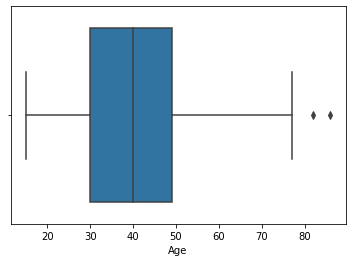

In [1631]:
sns.boxplot(df.Age)

In [1632]:
def age_br(r):
    if r<30:
        return 'Young'
    elif r <55:
        return 'Middle_Aged'
    else:
        return 'Senior_Citizen'

In [1633]:
df['Age_N']=df.Age.apply(age_br)
df.Age_N.head()

0    Senior_Citizen
1       Middle_Aged
2    Senior_Citizen
3       Middle_Aged
4       Middle_Aged
Name: Age_N, dtype: object

In [1634]:
df=df.drop('Age',1)
df.head(2)

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,M_Quartile,State_New,Age_N
0,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,10,4,NSW,Senior_Citizen
1,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,10,1,NSW,Middle_Aged


In [1635]:
df.isnull().sum()

gender                                  77
past_3_years_bike_related_purchases      0
job_title                              421
job_industry_category                  560
wealth_segment                           0
owns_car                                 0
tenure                                  76
property_valuation                       0
M_Quartile                               0
State_New                                0
Age_N                                    0
dtype: int64

In [1636]:
def binn(r):
    if r<3:
        return 0
    else:
        return 1

In [1639]:
# Lets make our target variable binary so that accuracy for models will be better.
df['Important_Customer']=df.M_Quartile.apply(binn)
df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,M_Quartile,State_New,Age_N,Important_Customer
0,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,10,4,NSW,Senior_Citizen,1
1,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,10,1,NSW,Middle_Aged,0
2,Male,33,NaN,IT,Mass Customer,No,7,9,1,QLD,Senior_Citizen,0
3,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8,4,2,NSW,Middle_Aged,0
4,Male,35,NaN,Retail,High Net Worth,Yes,13,9,2,VIC,Middle_Aged,0


In [1640]:
df=df.drop('M_Quartile',1)


In [1641]:
df.head(2)

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,State_New,Age_N,Important_Customer
0,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,10,NSW,Senior_Citizen,1
1,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,10,NSW,Middle_Aged,0


In [1649]:
coln={'Age_N':'Age','State_New':'State'}
df.rename(columns=coln,inplace=True)
df.head(1)

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,State,Age,Important_Customer
0,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,10,NSW,Senior_Citizen,1


In [1672]:
df.iloc[:,1]=pd.to_numeric(df.iloc[:,1])
df.iloc[:,6]=pd.to_numeric(df.iloc[:,6])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3410 non-null   object 
 1   past_3_years_bike_related_purchases  3487 non-null   int64  
 2   job_title                            3066 non-null   object 
 3   job_industry_category                2927 non-null   object 
 4   wealth_segment                       3487 non-null   object 
 5   owns_car                             3487 non-null   object 
 6   tenure                               3411 non-null   float64
 7   property_valuation                   3487 non-null   object 
 8   State                                3487 non-null   object 
 9   Age                                  3487 non-null   object 
 10  Important_Customer                   3487 non-null   int64  
dtypes: float64(1), int64(2), objec

In [1742]:
df.to_csv('Cleaned_Data',index=False)

In [1659]:
df_original=df.copy()

In [1673]:
df.isnull().sum()

gender                                  77
past_3_years_bike_related_purchases      0
job_title                              421
job_industry_category                  560
wealth_segment                           0
owns_car                                 0
tenure                                  76
property_valuation                       0
State                                    0
Age                                      0
Important_Customer                       0
dtype: int64

In [1674]:
#Lets perform a target encoding
from xverse.transformer import WOE
clf=WOE()

In [1675]:
X=df.drop('Important_Customer',1)
y=df['Important_Customer']

In [ ]:
#For target encoding the data will learn about target so its better to perform train test split first.

In [1676]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=10,test_size=0.2)


In [1655]:
xtrain.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,property_valuation,State,Age
37,Female,24,Accountant III,Manufacturing,Mass Customer,No,18,10,VIC,Middle_Aged
2433,Male,22,Associate Professor,Manufacturing,High Net Worth,No,11,5,VIC,Middle_Aged
2942,Female,23,Pharmacist,Health,Mass Customer,No,16,8,VIC,Middle_Aged
494,Male,19,Recruiting Manager,Retail,Affluent Customer,Yes,10,7,VIC,Young
2039,Male,21,Assistant Professor,Manufacturing,High Net Worth,No,5,8,NSW,Senior_Citizen


In [1657]:
ytrain.head()

37      0
2433    0
2942    0
494     1
2039    0
Name: Important_Customer, dtype: int64

In [1677]:
clf.fit(xtrain,ytrain)

C:\Users\Shakti\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


WOE(mono_custom_binning={'past_3_years_bike_related_purchases': array([ 0., 32., 65., 99.]),
                         'tenure': array([ 1.,  7., 14., 22.])},
    woe_bins={'Age': {'Middle_Aged': -0.01873746292357471,
                      'Senior_Citizen': 0.19169538221914442,
                      'Young': -0.09468512316260039},
              'State': {'ACT': -0.3861027247994688, 'NSW': -0.03310425559004504,
                        'QLD': 0.036340719843113385,
                        'VIC': 0.04196221522593...
                                     12: -0.13244362955930852},
              'tenure': {Interval(0.999, 7.0, closed='right'): 0.034432636229694016,
                         Interval(7.0, 14.0, closed='right'): -0.050456593140561216,
                         Interval(14.0, 22.0, closed='right'): 0.0043995106319832085,
                         'NA': 0.27529575744589635},
              'wealth_segment': {'Affluent Customer': -0.043695752658441285,
                                 

In [1678]:
xtrain_woe=clf.transform(xtrain)
xtest_woe=clf.transform(xtest)



In [1667]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

DT.fit(xtrain_woe,ytrain)

DecisionTreeClassifier()

In [1668]:
from sklearn.metrics import classification_report

pred=DT.predict(xtest_woe)

report=classification_report(ytest,pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.54      0.52       177
           1       0.50      0.47      0.48       172

    accuracy                           0.50       349
   macro avg       0.50      0.50      0.50       349
weighted avg       0.50      0.50      0.50       349



In [1679]:
from sklearn.metrics import accuracy_score,f1_score

In [1695]:
# Lets define a function for dataframe

df_me=pd.DataFrame(columns=['Model','Acc','f1score'])
def update(model,model_name):
    model.fit(xtrain_woe,ytrain)
    pred=model.predict(xtest_woe)
    
    global df_me
    df_me=df_me.append({'Model':model_name,'Acc':accuracy_score(ytest,pred),'f1score':f1_score(ytest,pred)},ignore_index=True)
    return df_me

In [1681]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,validation_curve

In [ ]:
RandomForestClassifier()

<ipython-input-1682-0457689e2b27>:25: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


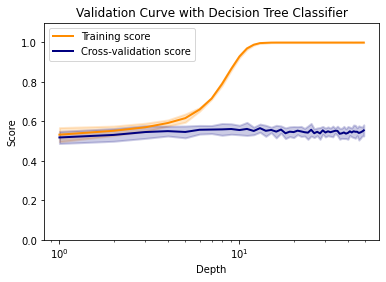

In [1682]:
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), xtrain_woe, ytrain, param_name="max_depth",scoring='f1',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
RandomForestClassifier()

In [1686]:
param=[{'n_estimators': np.arange(50,200,20),'criterion':['gini','entropy'],'max_depth':np.arange(5,12,1)}]
rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=5)

In [1687]:
rf_grid.fit(xtrain_woe,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
                          'n_estimators': array([ 50,  70,  90, 110, 130, 150, 170, 190])}])

In [1688]:
rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 70}

In [1696]:
rf_best=RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=6)

update(rf_best,'RF_best')

,Model,Acc,f1score
0,RF_best,0.507163,0.480363


In [1699]:
from sklearn.ensemble import AdaBoostClassifier

dt=DecisionTreeClassifier(max_depth=2)
ad=AdaBoostClassifier(base_estimator=dt)

<ipython-input-1698-c086d5f0b587>:25: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


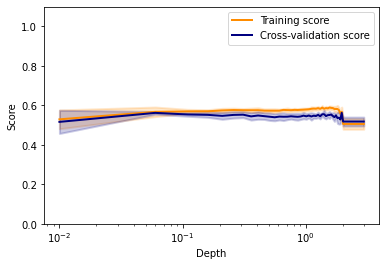

In [1698]:
param_range = np.arange(0.01,3,0.05)
train_scores, test_scores = validation_curve(
    ad, xtrain_woe, ytrain, param_name="learning_rate",scoring='f1',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.xlabel("Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [1702]:
param=[{'learning_rate':np.arange(0.01,0.5,0.01),'n_estimators': np.arange(40,80,10)}]
ad_grid=GridSearchCV(estimator=ad,param_grid=param)

ad_grid.fit(xtrain_woe,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
             param_grid=[{'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49]),
                          'n_estimators': array([40, 50, 60, 70])}])

In [1703]:
ad_grid.best_params_

{'learning_rate': 0.03, 'n_estimators': 50}

In [1708]:
ad=AdaBoostClassifier()
param=[{'learning_rate':np.arange(0.02,0.08,0.01),'n_estimators': np.arange(20,60,10)}]
ad_grid=GridSearchCV(estimator=ad,param_grid=param)

ad_grid.fit(xtrain_woe,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid=[{'learning_rate': array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07]),
                          'n_estimators': array([20, 30, 40, 50])}])

In [1709]:
ad_grid.best_params_

{'learning_rate': 0.06, 'n_estimators': 40}

In [1706]:
dt=DecisionTreeClassifier(max_depth=2)
ad_best_1=AdaBoostClassifier(base_estimator=dt,learning_rate=0.03,n_estimators=50)

update(ad_best_1,'AdaB_MD_2')

,Model,Acc,f1score
0,RF_best,0.507163,0.480363
1,AdaB_MD_2,0.504298,0.492669


In [1707]:
ad_best_2=AdaBoostClassifier(learning_rate=0.06,n_estimators=40)

update(ad_best_2,'AdaB_MD_1')

,Model,Acc,f1score
0,RF_best,0.507163,0.480363
1,AdaB_MD_2,0.504298,0.492669
2,AdaB_MD_1,0.504298,0.497093


In [1710]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [1714]:
param=[{'learning_rate':np.arange(0.02,0.08,0.01),'n_estimators': np.arange(20,60,10),'loss':['deviance','exponential'],
       'max_depth':np.arange(1,3,1)}]

gb_grid=GridSearchCV(estimator=gb,param_grid=param)

gb_grid.fit(xtrain_woe,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07]),
                          'loss': ['deviance', 'exponential'],
                          'max_depth': array([1, 2]),
                          'n_estimators': array([20, 30, 40, 50])}])

In [1715]:
gb_grid.best_params_

{'learning_rate': 0.06,
 'loss': 'exponential',
 'max_depth': 2,
 'n_estimators': 30}

In [1716]:
gb_best=GradientBoostingClassifier(learning_rate=0.06,loss='exponential',max_depth=2,n_estimators=30,random_state=10)

update(gb_best,'GB_Best')

,Model,Acc,f1score
0,RF_best,0.507163,0.480363
1,AdaB_MD_2,0.504298,0.492669
2,AdaB_MD_1,0.504298,0.497093
3,GB_Best,0.504298,0.492669


In [1717]:
from xgboost import XGBClassifier

In [1719]:
xgb=XGBClassifier()

In [1720]:
update(xgb,'XGBOOST')

[23:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shakti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Model,Acc,f1score
0,RF_best,0.507163,0.480363
1,AdaB_MD_2,0.504298,0.492669
2,AdaB_MD_1,0.504298,0.497093
3,GB_Best,0.504298,0.492669
4,XGBOOST,0.518625,0.517241


In [1476]:
# XGboost gives best accuracy and f1score

In [1734]:
#Now lets us build a model with full data set
clf=WOE()

clf.fit(X,y)

X_woe=clf.transform(X)

C:\Users\Shakti\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1738]:
X_woe.past_3_years_bike_related_purchases.value_counts()

-0.026219    1169
 0.011466    1163
 0.014989    1155
Name: past_3_years_bike_related_purchases, dtype: int64

In [1735]:
best_model=XGBClassifier().fit(X_woe,y)


[23:51:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Shakti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [ ]:
# Its a rough work. For any concern contact us.